In [11]:
#CIFAR=10 데이터셋 : 10가지 사물이 담긴 컬러 이미지

from tensorflow.keras import datasets, utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Dropout

def make_data():
    #다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    #원핫인코딩
    y_train = utils.to_categorical(y_train, 10)
    y_test = utils.to_categorical(y_test, 10)
    #데이터 정규화
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    return (X_train, y_train), (X_test, y_test)

In [19]:
from tensorflow.keras import  optimizers

def make_model():
    model = Sequential()
    #convolution layer1
    #padding = 'same' 출력크기를 입력크기와 같게 유지
    model.add(Conv2D(32,(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))

    #convolution layer2
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #드롭아웃: 과적합을 방지하기 위한 처리
    model.add(Dropout(0.25))
    #convolution layer3
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    #convolution layer4
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    #출력층
    model.add(Dense(10, activation='softmax'))
    #학습률 0.0001, decay 학습속도를 감소시키는 옵션
    opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [20]:
a = isinstance(1, int) # True
b = isinstance(1.2, float) #True

def plot_loss(history, title=None):
    #history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    #타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
    plt.ylabel('손실')
    plt.xlabel('에포크')
    plt.legend(['학습 데이터 성능', '검증 데이터 성능'], loc=0)

def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('정확도')
    plt.xlabel('에포크')
    plt.legend(['학습 데이터 성능', '검증 데이터 성능'], loc=0)

In [21]:
(X_train, y_train), (X_test, y_test) = make_data()

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
X_train.shape[1:]

(32, 32, 3)

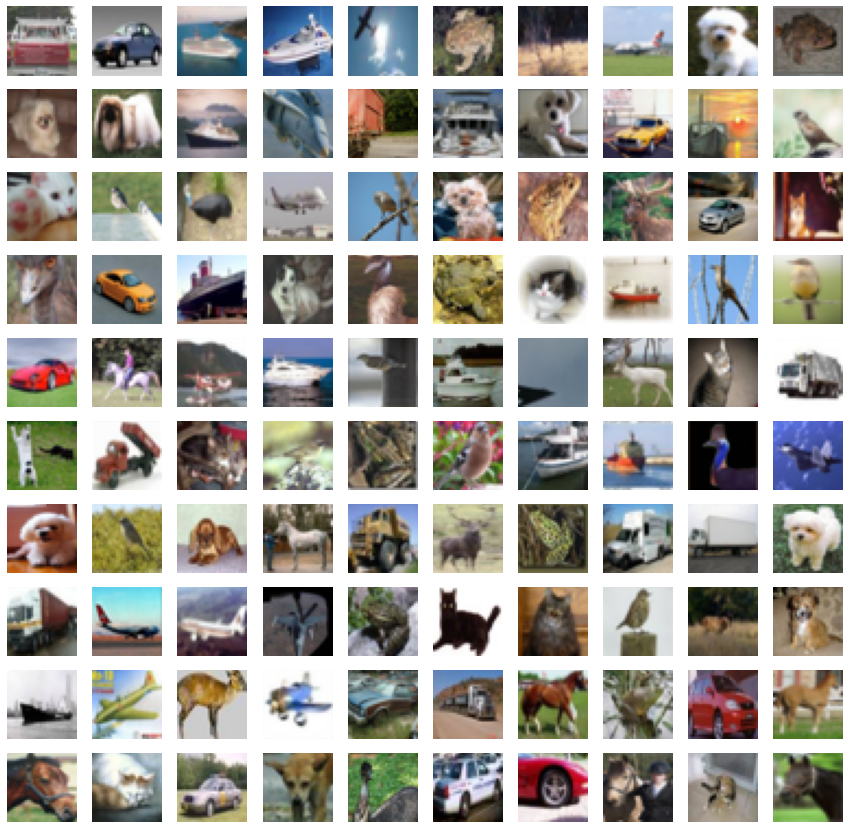

In [24]:
from six.moves import cPickle
import numpy as np
import matplotlib.pyplot as plt

f=open('C:/Users/Home/.keras/datasets/cifar-10-batches-py/data_batch_1', 'rb')
datadict = cPickle.load(f, encoding='latin1')
X=datadict['data']
y=datadict['labels']
X = X.reshape(10000,3,32,32).transpose(0,2,3,1).astype('uint8')
y = np.array(y)

fig, axes1=plt.subplots(10,10,figsize=(15,15))

for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])

In [25]:
#모델 생성
model = make_model()

In [26]:
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 44s 35ms/step - loss: 1.9553 - accuracy: 0.2817 - val_loss: 1.5314 - val_accuracy: 0.4467
Epoch 2/3
1250/1250 [==============================] - 43s 35ms/step - loss: 1.5040 - accuracy: 0.4587 - val_loss: 1.3717 - val_accuracy: 0.5150
Epoch 3/3
1250/1250 [==============================] - 43s 35ms/step - loss: 1.3604 - accuracy: 0.5115 - val_loss: 1.2431 - val_accuracy: 0.5644


In [27]:
#성능 평가
performance_test = model.evaluate(X_test, y_test, batch_size=100)
print(performance_test)

100/100 [==============================] - 1s 13ms/step - loss: 1.2288 - accuracy: 0.5664
[1.228817343711853, 0.5663999915122986]


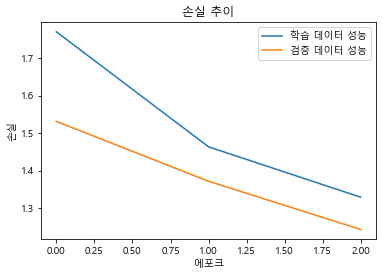

In [28]:
import matplotlib
import matplotlib.font_manager as fm
font_location = 'c:/windows/fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

plot_loss(history, '손실 추이')
plt.show()

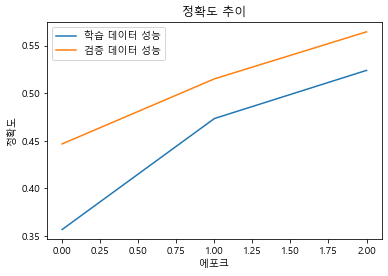

In [29]:
plot_acc(history, '정확도 추이')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(cm, range(10), range(10))
df_cm

313/313 [==============================] - 2s 6ms/step


,0,1,2,3,4,5,6,7,8,9
0,553,60,45,34,19,10,17,26,168,68
1,19,734,5,7,6,3,14,27,49,136
2,81,16,332,96,143,83,73,104,34,38
3,13,20,47,397,76,189,93,101,24,40
4,27,9,75,73,445,59,98,187,15,12
5,7,8,44,189,52,494,41,133,18,14
6,3,15,43,63,97,29,666,48,9,27
7,11,5,18,55,39,81,23,709,12,47
8,90,76,15,24,7,6,9,18,712,43
9,33,161,9,19,6,10,34,43,63,622


In [31]:
model.save('c:/data/cifar')

INFO:tensorflow:Assets written to: c:/data/cifar\assets
